# SoccerLovesHomeGames

In this project, we analyse the power that playing at home can have over soccer games

# Preparing the DataSet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split    
from sklearn.naive_bayes import MultinomialNB  

In [2]:

df = pd.read_csv("http://www.football-data.co.uk/mmz4281/1718/SP1.csv")

In [3]:
#table with data about the Spanish Soccer League (La Liga) for the 2017/18 season
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,SP1,18/08/17,Leganes,Alaves,1,0,H,1,0,H,...,1.46,18,-0.50,2.07,2.03,1.90,1.86,1.98,3.35,4.63
1,SP1,18/08/17,Valencia,Las Palmas,1,0,H,1,0,H,...,2.27,16,-0.75,2.05,1.97,1.96,1.91,1.78,4.24,4.43
2,SP1,19/08/17,Celta,Sociedad,2,3,A,1,1,D,...,1.84,18,-0.25,2.08,2.05,1.87,1.83,2.12,3.53,3.74
3,SP1,19/08/17,Girona,Ath Madrid,2,2,D,2,0,H,...,1.74,16,1.25,1.77,1.75,2.25,2.16,6.93,3.83,1.63
4,SP1,19/08/17,Sevilla,Espanol,1,1,D,1,1,D,...,2.09,16,-1.00,2.12,2.06,1.86,1.82,1.64,4.18,5.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,19/05/18,Villarreal,Real Madrid,2,2,D,0,2,A,...,3.79,19,0.25,2.05,1.98,1.93,1.87,4.74,5.05,1.62
376,SP1,20/05/18,Ath Bilbao,Espanol,0,1,A,0,1,A,...,2.06,17,-0.50,2.06,2.02,1.88,1.85,1.95,3.77,4.05
377,SP1,20/05/18,Ath Madrid,Eibar,2,2,D,1,1,D,...,1.98,19,-1.00,2.09,2.04,1.87,1.82,1.47,4.25,8.80
378,SP1,20/05/18,Barcelona,Sociedad,1,0,H,0,0,D,...,5.04,19,-2.00,1.94,1.89,2.03,1.97,1.31,6.40,8.60


In [4]:
#name of all teams in the league for that season
teams_number = df.HomeTeam.unique()
teams_number 

array(['Leganes', 'Valencia', 'Celta', 'Girona', 'Sevilla', 'Ath Bilbao',
       'Barcelona', 'La Coruna', 'Levante', 'Malaga', 'Betis', 'Sociedad',
       'Alaves', 'Las Palmas', 'Eibar', 'Espanol', 'Getafe',
       'Real Madrid', 'Villarreal', 'Ath Madrid'], dtype=object)

In [5]:
#number of all teams in the league for that season
len(teams_number )


20

In [6]:
#let's reduce the table, and display only the info that is important for us : team names, and goal counts
df = df[['HomeTeam','AwayTeam','FTHG','FTAG']]
df

,HomeTeam,AwayTeam,FTHG,FTAG
0,Leganes,Alaves,1,0
1,Valencia,Las Palmas,1,0
2,Celta,Sociedad,2,3
3,Girona,Ath Madrid,2,2
4,Sevilla,Espanol,1,1
...,...,...,...,...
375,Villarreal,Real Madrid,2,2
376,Ath Bilbao,Espanol,0,1
377,Ath Madrid,Eibar,2,2
378,Barcelona,Sociedad,1,0


In [7]:
#let's remane the table headers and make them redable 
df = df.rename(columns={'HomeTeam': 'Home_Team','AwayTeam': 'Away_Team','FTHG': 'Home_Goals', 'FTAG': 'Away_Goals'})

In [8]:
#let's show a sample of what our table currently looks like
df.head()

,Home_Team,Away_Team,Home_Goals,Away_Goals
0,Leganes,Alaves,1,0
1,Valencia,Las Palmas,1,0
2,Celta,Sociedad,2,3
3,Girona,Ath Madrid,2,2
4,Sevilla,Espanol,1,1


# Modeling our data

In [9]:
#let's create columns to display if the Home team was able to either win or have a draw 

df['Home_Wins'] = np.where(df.Home_Goals > df.Away_Goals, "True", "False")

df['Home_Draws'] = np.where(df.Home_Goals == df.Away_Goals, "True", "False")

print(df)

      Home_Team    Away_Team  Home_Goals  Away_Goals Home_Wins Home_Draws
0       Leganes       Alaves           1           0      True      False
1      Valencia   Las Palmas           1           0      True      False
2         Celta     Sociedad           2           3     False      False
3        Girona   Ath Madrid           2           2     False       True
4       Sevilla      Espanol           1           1     False       True
..          ...          ...         ...         ...       ...        ...
375  Villarreal  Real Madrid           2           2     False       True
376  Ath Bilbao      Espanol           0           1     False      False
377  Ath Madrid        Eibar           2           2     False       True
378   Barcelona     Sociedad           1           0      True      False
379    Valencia    La Coruna           2           1      True      False

[380 rows x 6 columns]


In [10]:
#calculating how many times the home team wins in this dataset

df_HomeWinners = df.Home_Wins   == "True"

df_HomeLosers = df.Home_Wins   == "False"

print('Home team wins : ',  len(df[df_HomeWinners]) , " times")

Home team wins :  179  times


In [11]:
#calculating how many times the home team get a draw

df_HomeTies = df.Home_Draws   == "True"

print('Home team draws : ' , len(df[df_HomeTies]) , " times")

Home team draws :  86  times


In [12]:
#let's put togehter all the positive results (wins + draws)

df_HomeGoodResults = df[df_HomeWinners] + df[df_HomeTies]

print('Home team wins or has a draw : ' , len(df_HomeGoodResults.index), " times")

Home team wins or has a draw :  265  times


In [13]:
#on the other hand, let's check the sum of all negative results (losses)

df_HomeBadResults = len(df.index) - len(df_HomeGoodResults.index)

print('Home team loses : ' , df_HomeBadResults, " times")

Home team loses :  115  times


In [14]:
#therefore, we can say that
print()
print('Home team wins : ',  len(df[df_HomeWinners]) , " times")
print('Home team wins or has a draw : ' , len(df_HomeGoodResults.index), " times")
print()
print('Since the total number of matches is equal to 360, we can say that Teams had good performance when playing home')


Home team wins :  179  times
Home team wins or has a draw :  265  times

Since the total number of matches is equal to 360, we can say that Teams had good performance when playing home


# Analysing number of Goals 

In [15]:
#Let's see if teams in La Liga were able to score better when in home

#we can start our analysis by checking the maximum number of goals scored at home and away in the whole league

df[['Home_Goals', 'Away_Goals']].max()

Home_Goals    7
Away_Goals    6
dtype: int64

In [16]:
# it's also possible to look into the average of goals scored at home and away in the whole league

df[['Home_Goals', 'Away_Goals']].mean()

Home_Goals    1.547368
Away_Goals    1.147368
dtype: float64

In [17]:
# let's show here the calculation of the min, max, std of the two sort of goals

print('\nAt home :', df['Home_Goals'].agg(['max', 'sum', 'mean', 'std']).round(2))
print('\nAway  :', df['Away_Goals'].agg(['max', 'sum', 'mean', 'std']).round(2))



At home : max       7.00
sum     588.00
mean      1.55
std       1.38
Name: Home_Goals, dtype: float64

Away  : max       6.00
sum     436.00
mean      1.15
std       1.19
Name: Away_Goals, dtype: float64


# Winning at home : numbers

In [18]:
# Since La Liga has 20 team, there are  38 match-rounds in the season >> 20*2 - 2 = 38

# Therefore, each team plays at home the exaclty half of season match >> (38-2) / 2 = 18 

# Let's verify this count how many times a team played at home (e.g. Barcelona)


df_Barca_Home = df['Home_Team'].str.contains('Barcelona').sum()

df_Barca_Home


print ("\n\nThere were {m} Barcelona Home Games".format(m=df_Barca_Home))




There were 19 Barcelona Home Games


In [19]:
# let's see the list of games, and get to know the number of games at home

filterinfDataframe = df[(df['Home_Team'] == "Barcelona") ]

print(filterinfDataframe)
len(filterinfDataframe)

     Home_Team    Away_Team  Home_Goals  Away_Goals Home_Wins Home_Draws
6    Barcelona        Betis           2           0      True      False
21   Barcelona      Espanol           5           0      True      False
40   Barcelona        Eibar           6           1      True      False
65   Barcelona   Las Palmas           3           0      True      False
80   Barcelona       Malaga           2           0      True      False
102  Barcelona      Sevilla           2           1      True      False
133  Barcelona        Celta           2           2     False       True
154  Barcelona    La Coruna           4           0      True      False
174  Barcelona      Levante           3           0      True      False
205  Barcelona       Alaves           2           1      True      False
224  Barcelona       Getafe           0           0     False       True
241  Barcelona       Girona           6           1      True      False
265  Barcelona   Ath Madrid           1           0

19

In [20]:
# Here, we will create variables to store this same data regarding two other teams > Espanol and Sevilla

df_Espanol_Home = df['Home_Team'].str.contains('Espanol').sum()
df_Sevilla_Home = df['Home_Team'].str.contains('Sevilla').sum()

print ("\n\nThere were {m} Espanyol Home Games".format(m=df_Espanol_Home))
print ("\n\nThere were {m} Sevilla Home Games".format(m=df_Sevilla_Home))




There were 19 Espanyol Home Games


There were 19 Sevilla Home Games


In [21]:
# from this sample, we are going to count how many times a team wins at Home

filterDf = df[(df['Home_Goals'] > df['Away_Goals']) & (df['Home_Team'] == "Barcelona") ]

#filterDf

In [22]:
print ("Barcelona won {m} Home Games".format(m=len(filterDf)), 'out of 18 games')

Barcelona won 16 Home Games out of 18 games


In [23]:
winPercentage =  (len(filterDf)/df_Barca_Home).round(2)

print("\nBarcelona won", winPercentage *100, '% of its games when playing at home\n')


Barcelona won 84.0 % of its games when playing at home



In [24]:
# we can do the same to the other two teams 

filterDf_Espanol = df[(df['Home_Goals'] > df['Away_Goals']) & (df['Home_Team'] == "Espanol") ]
filterDf_Sevilla = df[(df['Home_Goals'] > df['Away_Goals']) & (df['Home_Team'] == "Sevilla") ]

#filterDf_Espanol
filterDf_Sevilla

,Home_Team,Away_Team,Home_Goals,Away_Goals,Home_Wins,Home_Draws
23,Sevilla,Eibar,3,0,True,False
46,Sevilla,Las Palmas,1,0,True,False
64,Sevilla,Malaga,2,0,True,False
93,Sevilla,Leganes,2,1,True,False
114,Sevilla,Celta,2,1,True,False
134,Sevilla,La Coruna,2,0,True,False
226,Sevilla,Girona,1,0,True,False
263,Sevilla,Ath Bilbao,2,0,True,False
348,Sevilla,Sociedad,1,0,True,False
359,Sevilla,Real Madrid,3,2,True,False


In [25]:
print ("Sevilla won {m} Home Games".format(m=len(filterDf_Sevilla)), 'out of 18 games')

winPercentage_Sevilla =  (len(filterDf_Sevilla)/df_Barca_Home).round(1)  #we can use df_Barca_home since all teams play 18 games

print("Therefore, Sevilla won around", winPercentage_Sevilla *100, '% of its games when playing at home\n')



Sevilla won 11 Home Games out of 18 games
Therefore, Sevilla won around 60.0 % of its games when playing at home

Espanol won 8 Home Games out of 18 games
Therefore, Espanol won  around 40.0 % of its games when playing at home



# Graphics

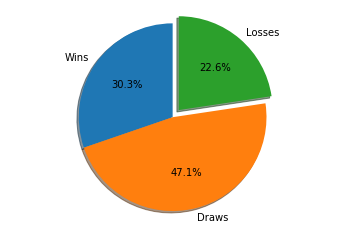

In [26]:
# Using a pie chart to illustrate the overal number of wins for Home Teams

labels = 'Wins', 'Draws', 'Losses'

sizes = [df_HomeBadResults, len(df[df_HomeWinners]), len(df[df_HomeTies])]

explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')  

plt.show()

Text(0.5, 0, 'Team')

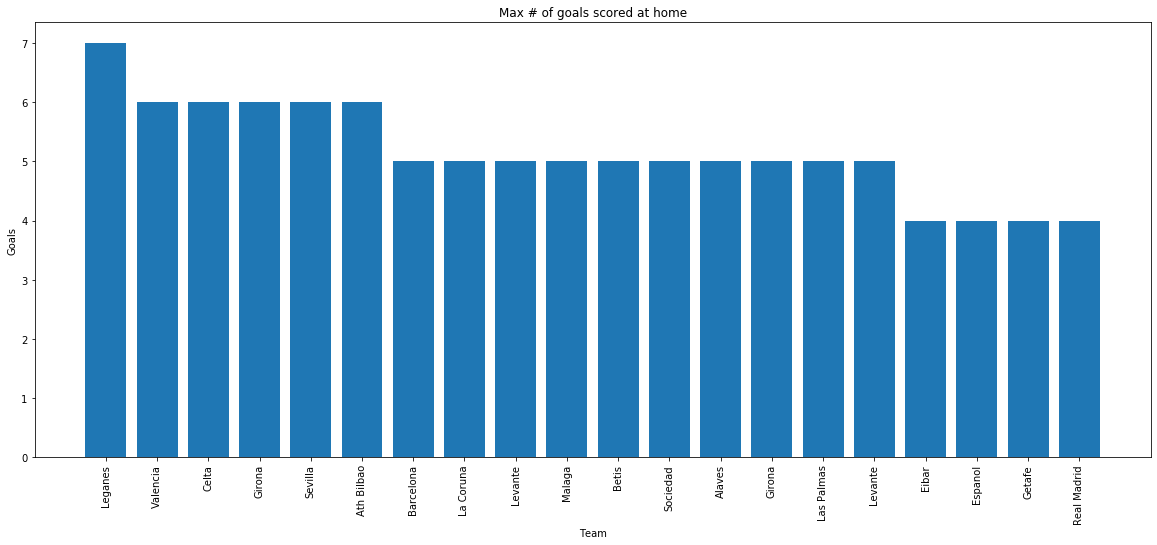

In [27]:
# Comparing the amount of goals scored at home versus the amount of goals scored away
# this comparison show that MORE teams scored MORE record of gols when at home

#first illustration

max_home = df.Home_Goals.sort_values(ascending = False)
max_home.head(10)
%matplotlib inline 
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(20), max_home.head(20).values,align = "center")
ax.set_xticks(range(20))
ax.set_xticklabels(df.Home_Team.values,rotation = "vertical")  #check
ax.set_title("Max # of goals scored at home")
ax.set_ylabel("Goals")
ax.set_xlabel("Team")


Text(0.5, 0, 'Team')

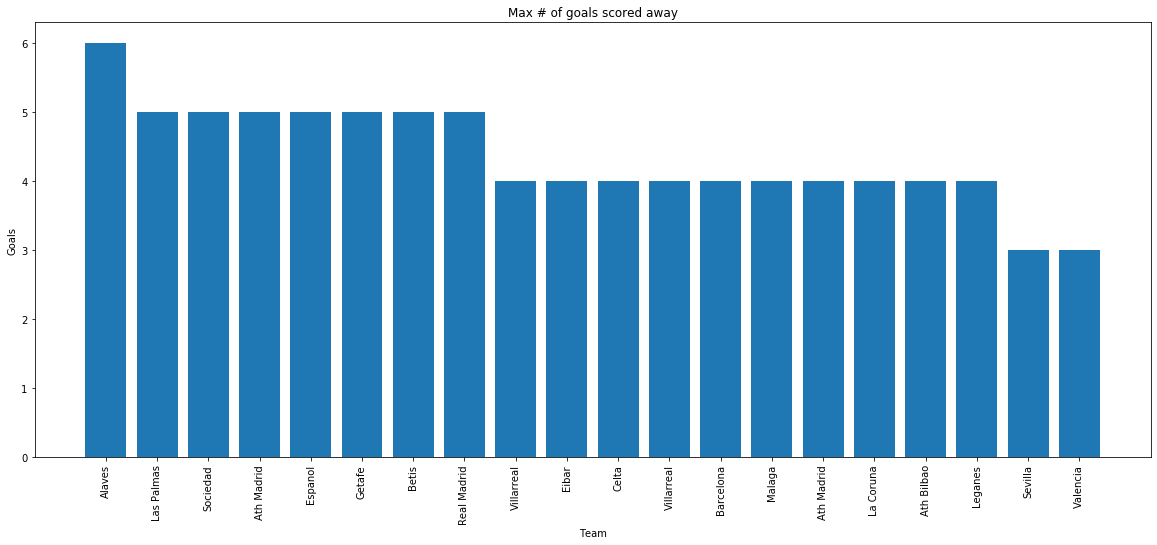

In [28]:
#second illustration

max_away = df.Away_Goals.sort_values(ascending = False)
max_away.head(10)
%matplotlib inline 
fig2 = plt.figure(figsize = (20,8))
ax = fig2.add_subplot(1,1,1)
rects = ax.bar(range(20), max_away.head(20).values,align = "center")
ax.set_xticks(range(20))
ax.set_xticklabels(df.Away_Team.values,rotation = "vertical")  #check
ax.set_title("Max # of goals scored away")
ax.set_ylabel("Goals")
ax.set_xlabel("Team")


In [29]:
# Calculating number of goals in the season 
home_goals_sum = df['Home_Goals'].sum()
away_goals_sum = df['Away_Goals'].sum()
season_goals_sum = home_goals_sum + away_goals_sum 
print (home_goals_sum , '+', away_goals_sum , '=', season_goals_sum, ' goals in the season' )

588 + 436 = 1024  goals in the season


Text(0, 0.5, 'Frequency')

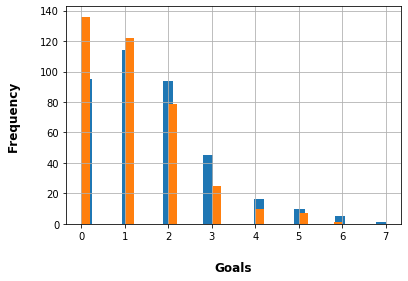

In [30]:
# Out of this numbers,  we make another representation of Home Goals stats

hist = df.Home_Goals.hist(bins=30)
hist2 = df.Away_Goals.hist(bins=30)
hist.set_xlabel("Goals", labelpad=20, weight='bold', size=12)
hist.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)


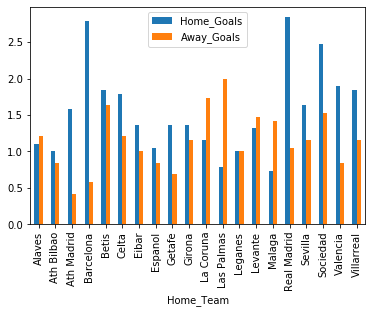

In [31]:
#Comparing the average number of gols away x home to all teams

df.groupby('Home_Team').mean().plot(kind='bar')

Text(0.5, 1.0, 'Goals When Sevilla played at Home')

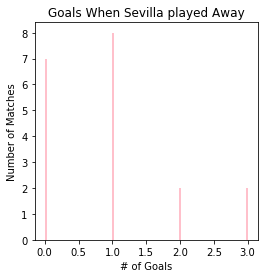

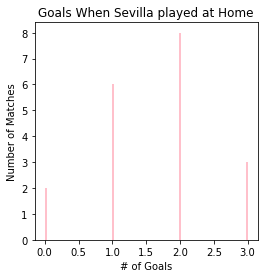

In [32]:
# if we want to see this analysis closer, we can choose a team , and do this same study 

dfSevAway = df[ (df['Away_Team'] == "Sevilla") ]
dfSevillaA  = dfSevAway.Away_Goals
dfSevHome = df[ (df['Home_Team'] == "Sevilla") ]
dfSevillaH  = dfSevHome.Home_Goals


fig4 = plt.figure(figsize=(4,4))
plt.hist(dfSevillaA, 100, color="pink")
plt.xlabel("# of Goals")
plt.ylabel("Number of Matches")
plt.title("Goals When Sevilla played Away")


fig3 = plt.figure(figsize=(4,4))
plt.hist(dfSevillaH, 100, color="pink")
plt.xlabel("# of Goals")
plt.ylabel("Number of Matches")
plt.title("Goals When Sevilla played at Home")

Text(0.5, 1.0, 'Goals When Sevilla played')

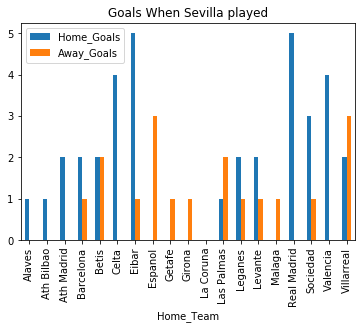

In [33]:
dfSevAway.groupby('Home_Team').mean().plot(kind='bar')
plt.title("Goals When Sevilla played")

# Predicting Results when playing at Home


In [34]:
# let's see the list of games, just to double check the data

filterinfDataframe = df[(df['Home_Team'] == "Sevilla") ]

print(filterinfDataframe)
len(filterinfDataframe)

    Home_Team    Away_Team  Home_Goals  Away_Goals Home_Wins Home_Draws
4     Sevilla      Espanol           1           1     False       True
23    Sevilla        Eibar           3           0      True      False
46    Sevilla   Las Palmas           1           0      True      False
64    Sevilla       Malaga           2           0      True      False
93    Sevilla      Leganes           2           1      True      False
114   Sevilla        Celta           2           1      True      False
134   Sevilla    La Coruna           2           0      True      False
150   Sevilla      Levante           0           0     False       True
171   Sevilla        Betis           3           5     False      False
207   Sevilla       Getafe           1           1     False       True
226   Sevilla       Girona           1           0      True      False
246   Sevilla   Ath Madrid           2           5     False      False
263   Sevilla   Ath Bilbao           2           0      True    

19

# Taking our project to the next level

In [35]:
import pandas as pd 
from numpy.random.mtrand import shuffle

data = []
for _, d in filterinfDataframe.iterrows():
    GoalsHome = d['Home_Goals']
    GoalsAway  = d['Away_Goals']
    
    if GoalsHome > GoalsAway:
        data.append(2)
    elif GoalsHome < GoalsAway:     
        data.append(0) 
    else: 
        data.append(1)
Matches = 3
import numpy as np
InData = np.zeros((len(data)-Matches,Matches))
OutData = np.zeros((len(data)-Matches))
for i in range(len(data)-Matches):
    InData[i] = data[i:i+Matches]
    OutData[i]   = data[i+Matches]
print(data)


[1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2]


In [36]:
from sklearn.model_selection import train_test_split    
train_x, test_x, train_y, test_y = train_test_split(InData,OutData,test_size=0.2, shuffle=False)
from sklearn.naive_bayes import MultinomialNB  
clf_nayve = MultinomialNB().fit(train_x, train_y) 
pred_naive = clf_nayve.predict(test_x)
print(train_x)
print(test_x)
#print(train_y)
#print(test_y)
print(pred_naive)
print(np.mean(test_y == pred_naive))

[[1. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 1.]
 [2. 1. 0.]
 [1. 0. 1.]
 [0. 1. 2.]
 [1. 2. 0.]
 [2. 0. 2.]
 [0. 2. 0.]]
[[2. 0. 1.]
 [0. 1. 1.]
 [1. 1. 2.]
 [1. 2. 2.]]
[2. 2. 2. 2.]
0.75


In [37]:

df.memory_usage()

Index          128
Home_Team     3040
Away_Team     3040
Home_Goals    3040
Away_Goals    3040
Home_Wins     3040
Home_Draws    3040
dtype: int64